### Downloading the dataset

In [1]:
from google.colab import files, drive

In [2]:
drive.mount('/content/MyDrive', force_remount = True)

Mounted at /content/MyDrive


In [ ]:
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d sripaadsrinivasan/audio-mnist -p /content/MyDrive/MyDrive/2022/ECS271Project/ --force

 99% 936M/948M [00:08<00:00, 56.9MB/s]
100% 948M/948M [00:08<00:00, 114MB/s] 


In [ ]:
!unzip /content/MyDrive/MyDrive/2022/ECS271Project/audio-mnist.zip -d /content/MyDrive/MyDrive/2022/ECS271Project/

### Preprocessing the data

In [ ]:
# Installing the required libraries
!pip install librosa

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Count total data

folder_path = '/content/MyDrive/MyDrive/2022/ECS271Project/data/'

dataset = []

for folder in tqdm(range(1, 61), colour = 'green'):
  if folder < 10:
    folder = os.path.join(folder_path, '0' + str(folder))
  else:
    folder = os.path.join(folder_path, str(folder))

  print(len(os.listdir(folder)))

  2%|▏         | 1/60 [00:07<07:14,  7.37s/it]

500


  3%|▎         | 2/60 [00:12<05:44,  5.94s/it]

500


  5%|▌         | 3/60 [00:16<05:04,  5.33s/it]

500


  7%|▋         | 4/60 [00:21<04:37,  4.95s/it]

500


  8%|▊         | 5/60 [00:26<04:27,  4.87s/it]

500


 10%|█         | 6/60 [00:29<04:04,  4.53s/it]

500


 12%|█▏        | 7/60 [00:33<03:47,  4.29s/it]

500


 13%|█▎        | 8/60 [00:37<03:37,  4.19s/it]

500


 15%|█▌        | 9/60 [00:41<03:23,  3.98s/it]

500


 17%|█▋        | 10/60 [00:45<03:20,  4.01s/it]

500


 18%|█▊        | 11/60 [00:48<03:10,  3.89s/it]

500


 20%|██        | 12/60 [00:52<03:00,  3.77s/it]

500


 22%|██▏       | 13/60 [00:55<02:52,  3.67s/it]

500


 23%|██▎       | 14/60 [00:59<02:42,  3.53s/it]

500


 25%|██▌       | 15/60 [01:01<02:30,  3.34s/it]

500


 27%|██▋       | 16/60 [01:05<02:26,  3.33s/it]

500


 28%|██▊       | 17/60 [01:08<02:22,  3.33s/it]

500


 30%|███       | 18/60 [01:11<02:20,  3.35s/it]

500


 32%|███▏      | 19/60 [01:15<02:15,  3.31s/it]

500


 33%|███▎      | 20/60 [01:18<02:09,  3.23s/it]

500


 35%|███▌      | 21/60 [01:21<02:03,  3.18s/it]

500


 37%|███▋      | 22/60 [01:24<02:02,  3.24s/it]

500


 38%|███▊      | 23/60 [01:27<01:57,  3.16s/it]

500


 40%|████      | 24/60 [01:31<01:57,  3.26s/it]

500


 42%|████▏     | 25/60 [01:33<01:49,  3.12s/it]

500


 43%|████▎     | 26/60 [01:37<01:45,  3.12s/it]

500


 43%|████▎     | 26/60 [01:39<02:10,  3.84s/it]


KeyboardInterrupt: ignored

In [3]:
# Importing the required libraries
import numpy as np
import pandas as pd
import librosa
import librosa.display as dsp 
from IPython.display import Audio
import os 
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from tqdm import tqdm

In [ ]:
def raw_audio_data(file):
  """
  Given the file, get the raw data from the file

  Params:
    file(File) -- File of the audio data 

  Returns:
    (np.array) -- Extracted features from the file
  """

  audio, sample_rate = librosa.load(file)

  extracted_features = librosa.feature.mfcc(
      y = audio,
      sr = sample_rate,
      n_mfcc = 40
  )

  # Scale the extracted features
  features = np.mean(extracted_features.T, axis = 0)

  return features


In [ ]:
folder_path = '/content/MyDrive/MyDrive/2022/ECS271Project/data/'

dataset = []

for folder in tqdm(range(1, 61), colour = 'green'):
  if folder < 10:
    folder = os.path.join(folder_path, '0' + str(folder))
  else:
    folder = os.path.join(folder_path, str(folder))

  for file in os.listdir(folder):
    file_path = os.path.join(folder, file)

    features = raw_audio_data(file_path)
    label = file[0]

    dataset.append([features, label])


raw_df = pd.DataFrame(dataset, columns = ['features', 'labels'])

100%|██████████| 60/60 [38:19<00:00, 38.32s/it]


In [ ]:
raw_df.to_csv('/content/MyDrive/MyDrive/2022/ECS271Project/raw_audio_data.csv')

### Getting the spectogram for all waveforms

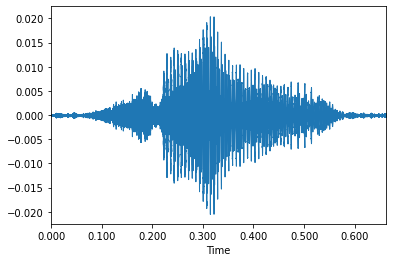

In [ ]:
y, sr = librosa.load('/content/MyDrive/MyDrive/2022/ECS271Project/data/01/0_01_39.wav')
librosa.display.waveplot(y)

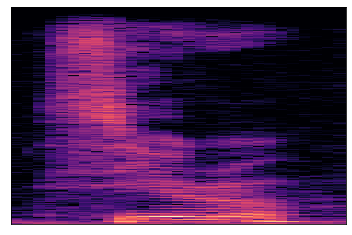

In [ ]:
D = librosa.stft(y)

# Convert to decibel
dbs = librosa.amplitude_to_db(np.abs(D), ref = np.max)


image = librosa.display.specshow(dbs)

In [ ]:
 # Save the image
def save_spectogram(file, destination):
  audio, sample_rate = librosa.load(file)
  matplotlib.use('Agg')
  fig, ax = plt.subplots()
  # Short Fourier transform
  D = librosa.stft(audio)

  # Convert to decibel
  dbs = librosa.amplitude_to_db(np.abs(D), ref = np.max)

 
  image = librosa.display.specshow(dbs, ax = ax)

  plt.savefig(destination, bbox_inches='tight')
  plt.show()
  plt.close()

In [ ]:
folder_path = '/content/MyDrive/MyDrive/2022/ECS271Project/data/'

dataset = []
unique_id_counter = {
    0: 0,
    1: 0,
    2: 0,
    3: 0,
    4: 0,
    5: 0,
    6: 0,
    7: 0,
    8: 0,
    9: 0,
}



for folder in tqdm(range(4, 61), colour = 'green'):
  if folder < 10:
    folder = os.path.join(folder_path, '0' + str(folder))
  else:
    folder = os.path.join(folder_path, str(folder))

  for file in os.listdir(folder):
    file_path = os.path.join(folder, file)
    destination_path = '/content/MyDrive/MyDrive/2022/ECS271Project'

    if not os.path.exists(destination_path+'/spectogram_images/'):
      os.makedirs(destination_path+'/spectogram_images/')
    
    spectogram_path = destination_path+'/spectogram_images/'

    if not os.path.exists(spectogram_path + str(file[0]) + '/'):
      os.makedirs(spectogram_path + str(file[0]) + '/')
    
    image_path = spectogram_path + str(file[0]) + '/{}'.format(unique_id_counter[int(file[0])])
    unique_id_counter[int(file[0])] += 1
    save_spectogram(file_path, image_path)


100%|██████████| 57/57 [1:12:49<00:00, 76.65s/it]


In [ ]:
spectogram_path = '/content/MyDrive/MyDrive/2022/ECS271Project/spectogram_images'

unique_id_counter = {
    0: 0,
    1: 0,
    2: 0,
    3: 0,
    4: 0,
    5: 0,
    6: 0,
    7: 0,
    8: 0,
    9: 0,
}

for dir in os.listdir(spectogram_path):
  for file in os.listdir(spectogram_path + "/" + dir + "/"):
    unique_id_counter[int(dir)] += 1

In [ ]:
def get_audio(digit, destination, name_of_file):
    # Audio Sample Directory
    sample = np.random.randint(1,60)
    # Index of Audio
    index = np.random.randint(1,5)
    matplotlib.use('Agg')
    # Modified file location
    if sample<10:
        file = f"/content/MyDrive/MyDrive/2022/ECS271Project/data/0{sample}/{digit}_0{sample}_{index}.wav"
    else:
        file = f"/content/MyDrive/MyDrive/2022/ECS271Project/data/{sample}/{digit}_{sample}_{index}.wav"

    fig, ax = plt.subplots()
    # Get Audio from the location
    data,sample_rate = librosa.load(file)
    
    # Plot the audio wave
    dsp.waveshow(data,sr=sample_rate, ax = ax)
    # Show the widget
    
    plt.savefig(destination+'/'+name_of_file, bbox_inches='tight')
    plt.show()
    plt.close()
    # return [Audio(data=data,rate=sample_rate), plot]


In [ ]:
os.makedirs('/content/MyDrive/MyDrive/2022/ECS271Project/ForPlotting/')

In [ ]:
for i in tqdm(range(10), colour = 'green'):
  for j in range(10):
    get_audio(i,'/content/MyDrive/MyDrive/2022/ECS271Project/ForPlotting/', str(i) + str(j))

100%|██████████| 10/10 [01:22<00:00,  8.20s/it]


<Figure size 432x288 with 0 Axes>

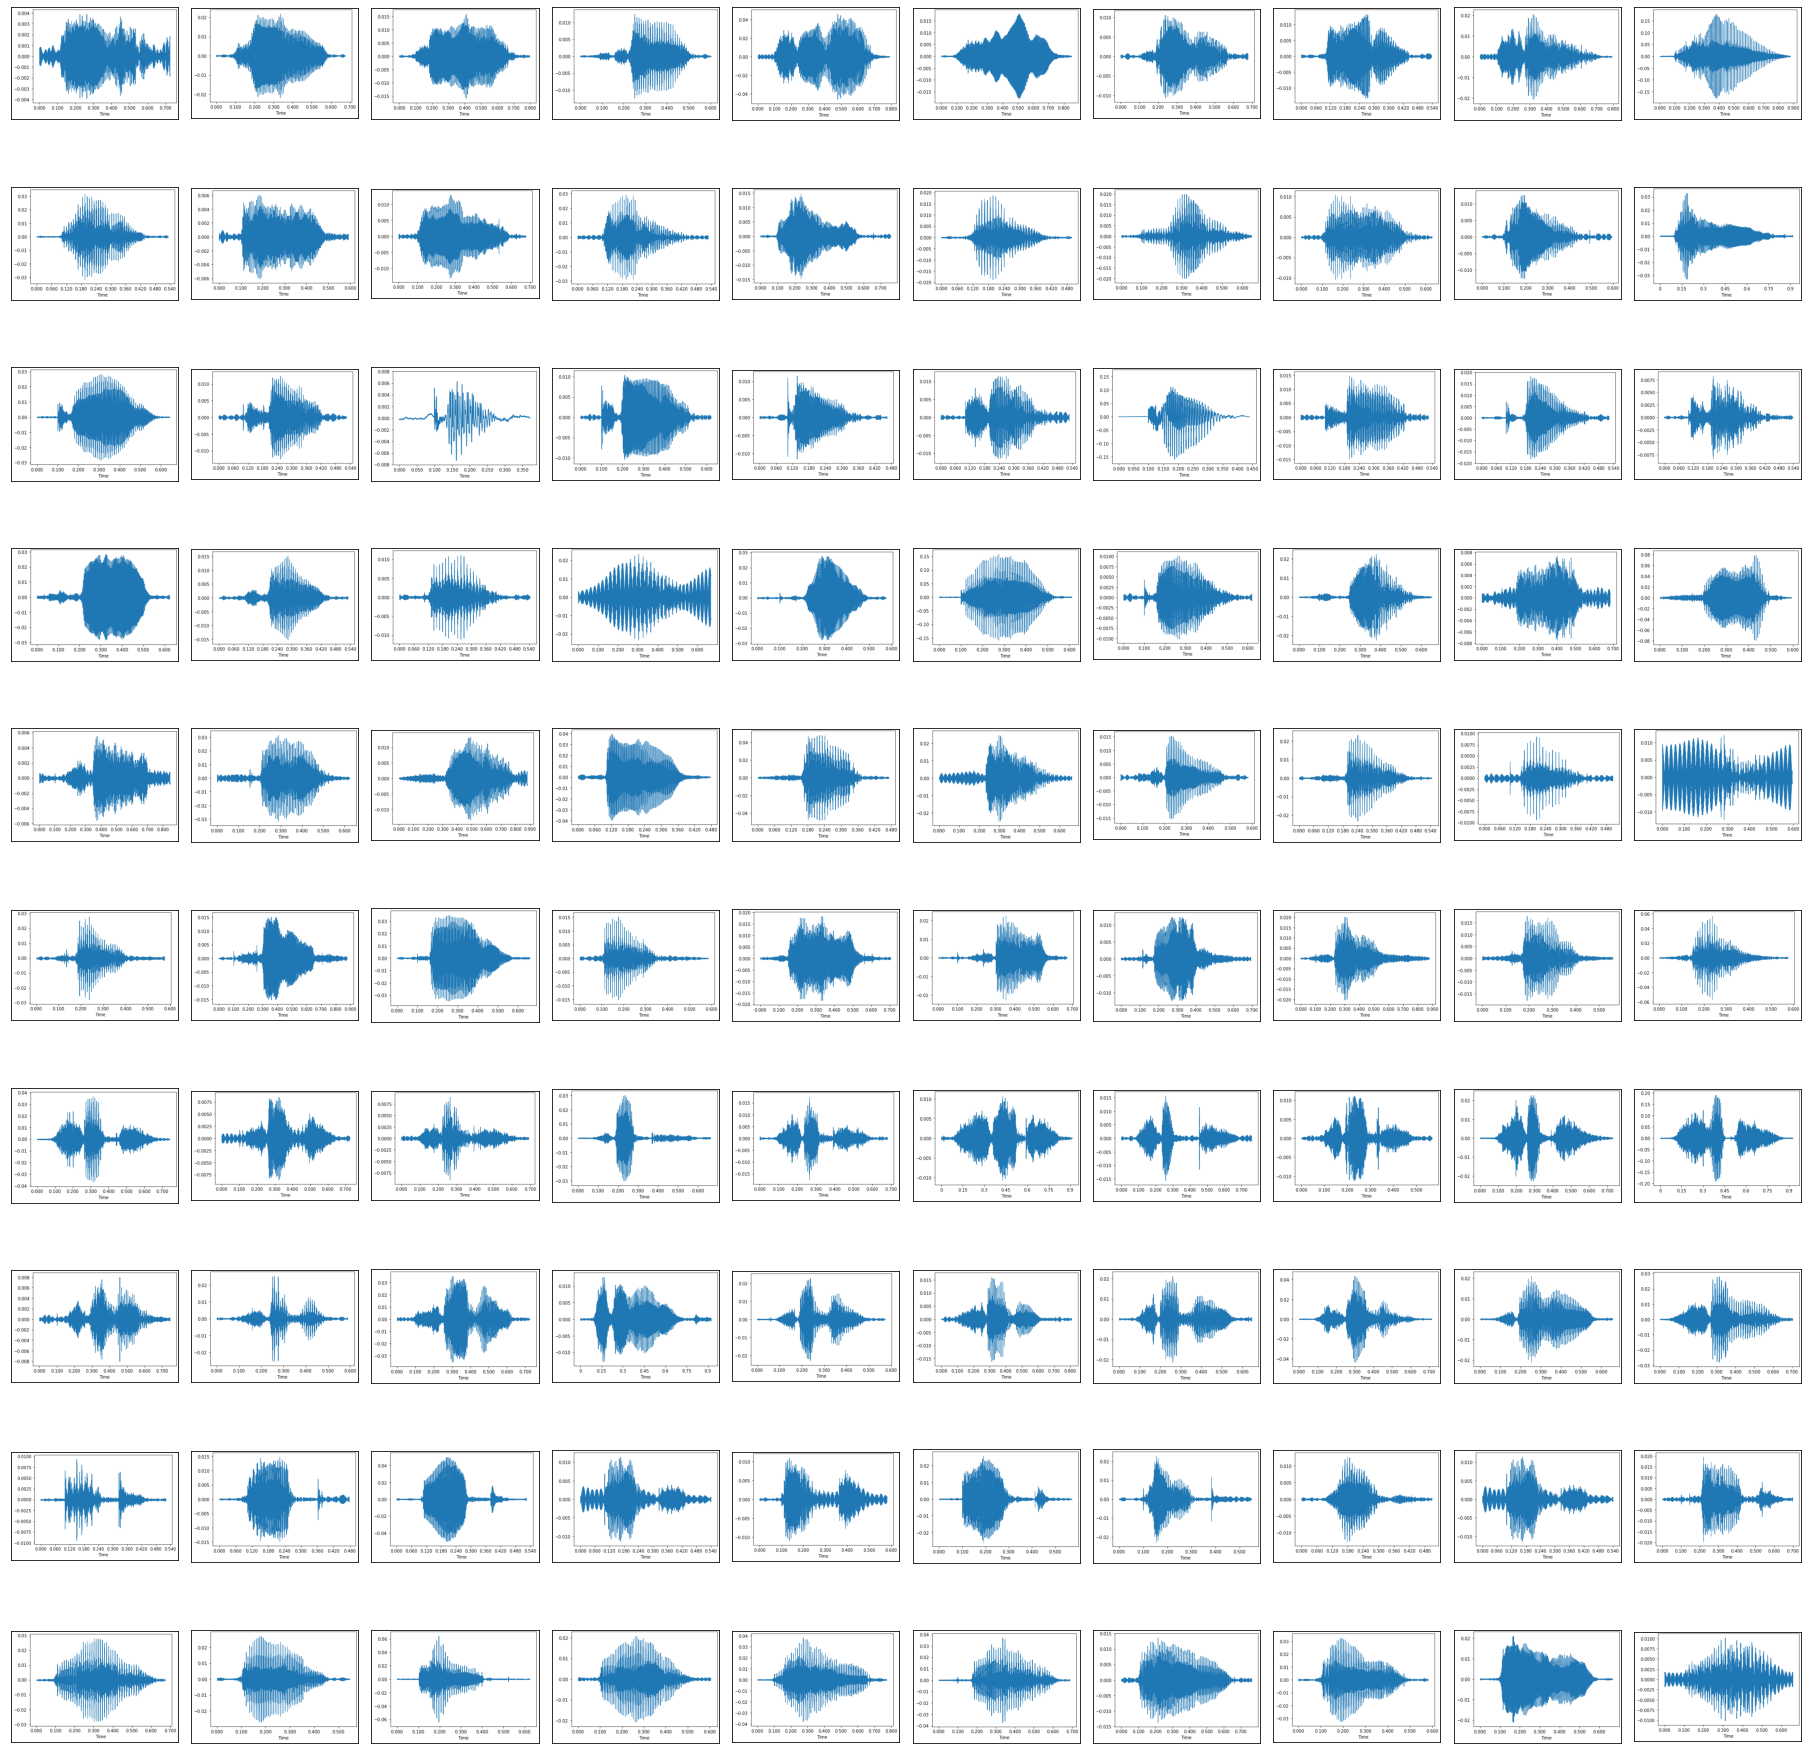

In [4]:
plt.figure()
f, axarr = plt.subplots(10, 10, figsize=(25, 25), constrained_layout = True) 

for i in range(10):
    for j in range(10):
        ax = axarr[i][j]
        ax.set_xticks([])
        ax.set_yticks([])

for i in range(10):
    for j in range(10):
                
        # plot
        image = plt.imread('/content/MyDrive/MyDrive/2022/ECS271Project/ForPlotting/{}.png'.format(str(i) + str(j)))
        axarr[i][j].imshow(image)

plt.show()

<Figure size 432x288 with 0 Axes>

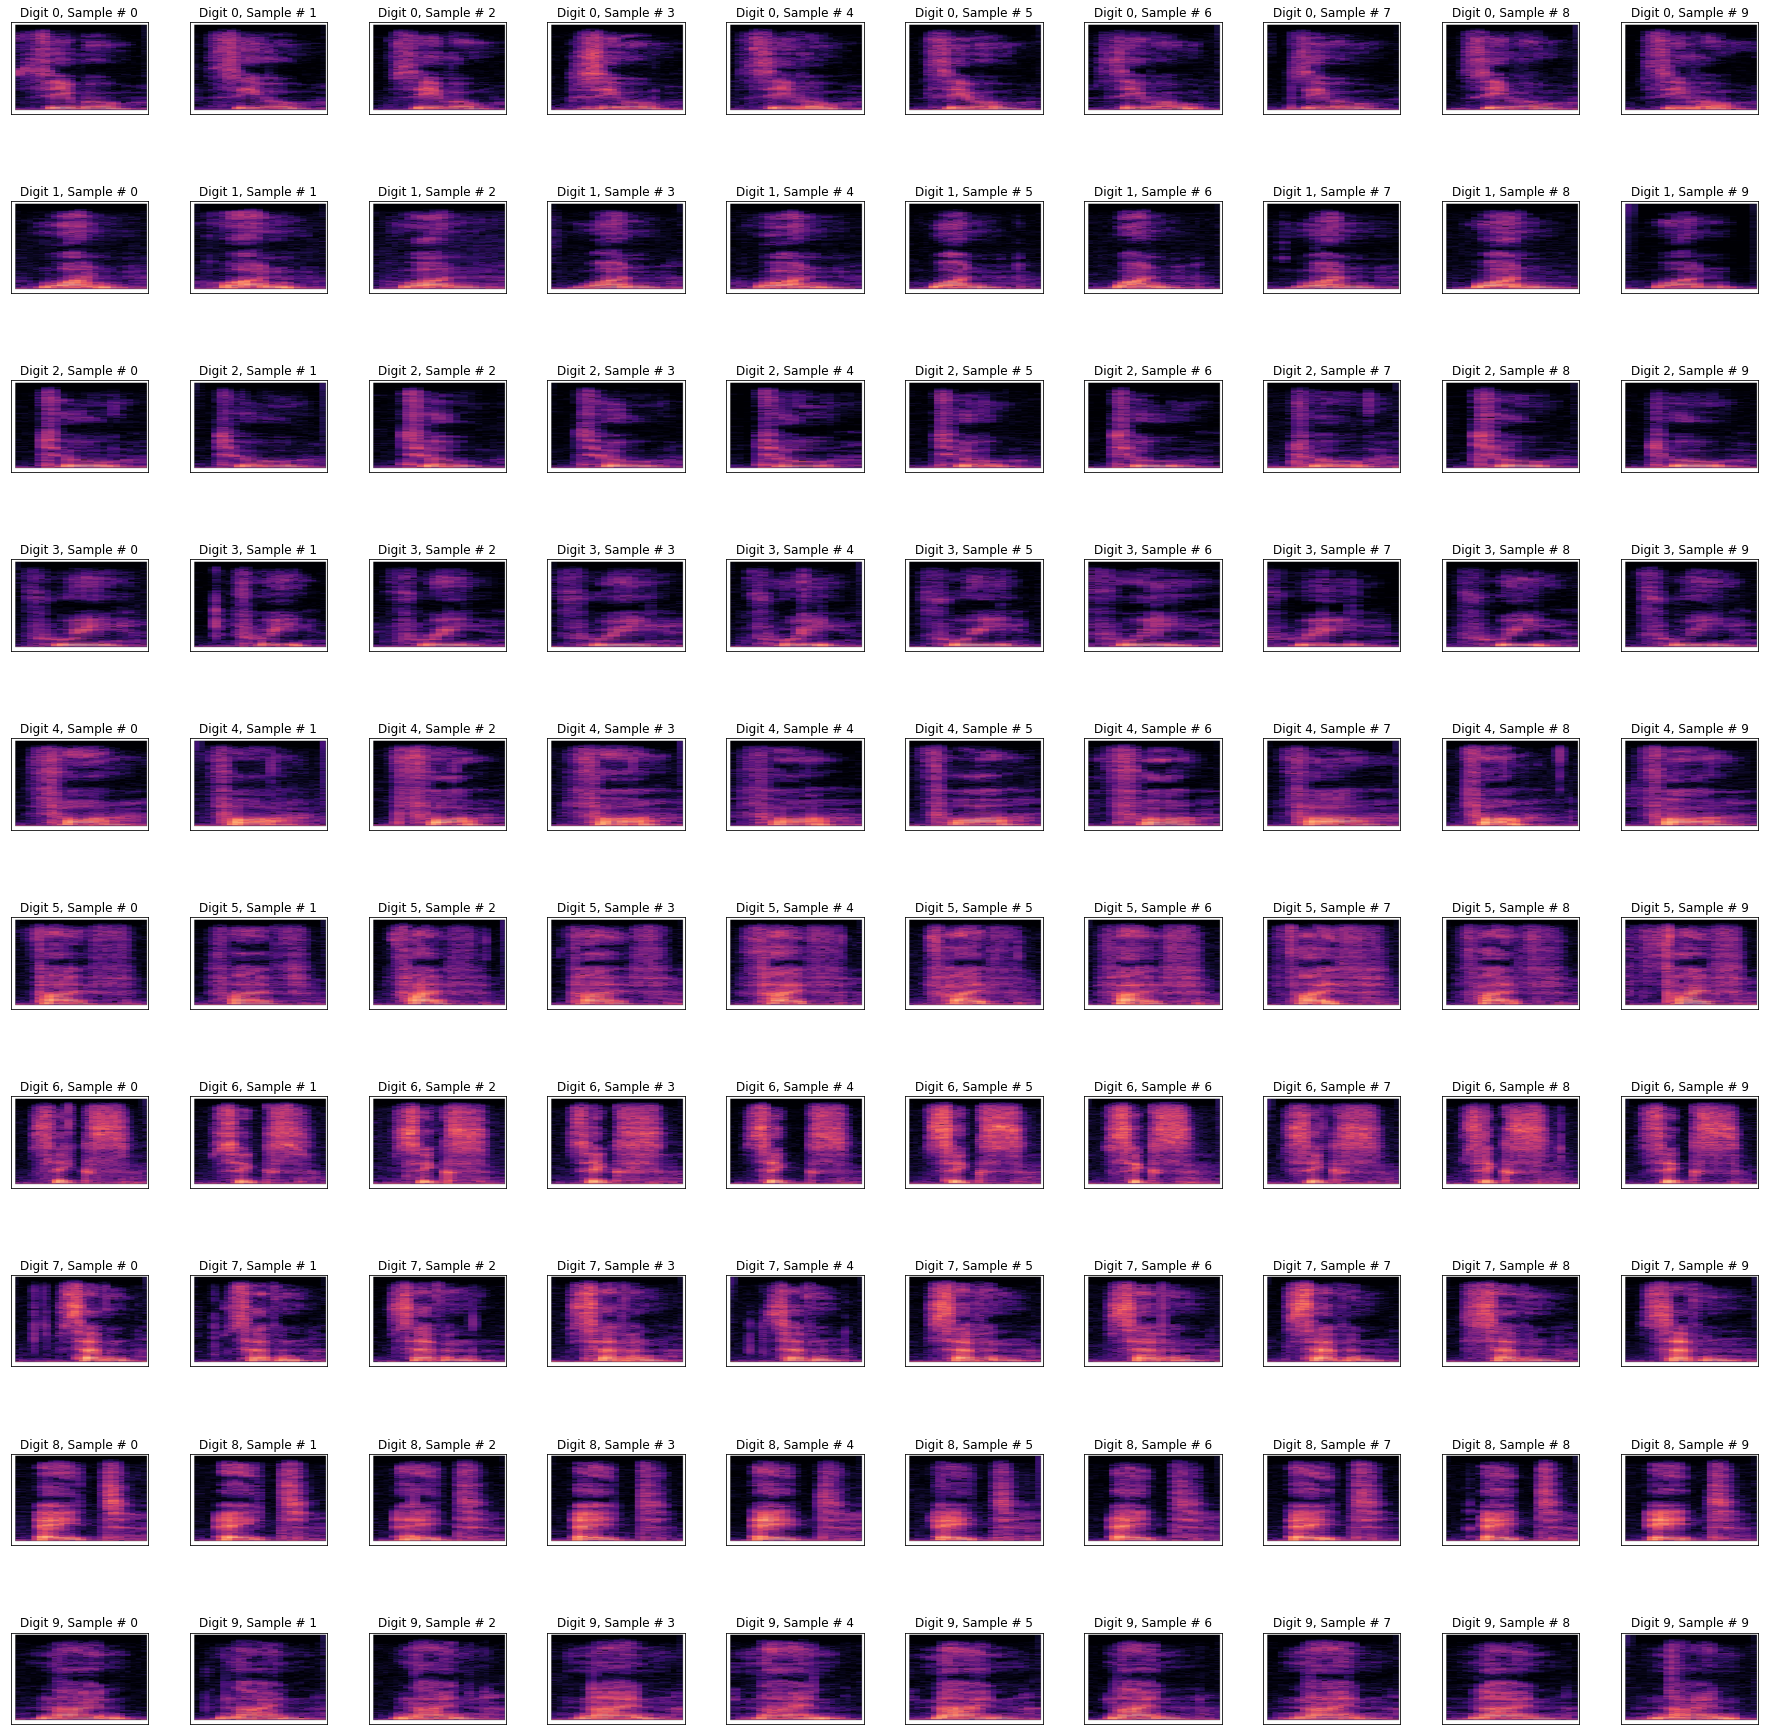

In [ ]:
plt.figure()
f, axarr = plt.subplots(10, 10, figsize=(25, 25)) 
f.tight_layout()

for i in range(10):
    for j in range(10):
        ax = axarr[i][j]
        ax.set_xticks([])
        ax.set_yticks([])

for i in range(10):
    for j in range(10):
                
        # plot
        image = plt.imread('/content/MyDrive/MyDrive/2022/ECS271Project/spectogram_images/{}/{}.png'.format(str(i),str(j)))
        axarr[i][j].imshow(image)

        # label
        axarr[i][j].set_title('Digit {}, Sample # {}'.format(i, j))

plt.show()

In [ ]:
from PIL import Image, ImageChops


def trim(im):
  bg = Image.new(im.mode, im.size, im.getpixel((0,0)))
  diff = ImageChops.difference(im, bg)
  diff = ImageChops.add(diff, diff, 2.0, -100)
  bbox = diff.getbbox()
  return im.crop(bbox)

In [ ]:
x = trim(Image.open('/content/MyDrive/MyDrive/2022/ECS271Project/spectogram_images/0/0.png'))

# Modelling using SVMs on the waveform data

In [ ]:
path = '/content/MyDrive/MyDrive/2022/ECS271Project/'

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.multiclass import OneVsRestClassifier
import pandas as pd
import pickle

In [ ]:
df = pd.read_csv(path + 'raw_audio_data.csv')

In [ ]:
df = df[['features', 'labels']]

In [ ]:
def preprocess_vector(x):
  x = x.strip('][').split(' ')
  x = [float(y.strip()) for y in x if y != '']
  return x

df['features'] = df['features'].apply(preprocess_vector, 1)



In [ ]:
X, y = df['features'], df['labels']
X = [np.array(x) for x in X]
y = np.array(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

In [ ]:
import warnings
warnings.filterwarnings('ignore')
clf = LinearSVC(random_state=0, tol=1e-2)
clf = OneVsRestClassifier(estimator = clf)
clf.fit(X_train, y_train)

predicted = clf.predict(X_test)

# get the accuracy
print (accuracy_score(y_test, predicted))

0.7881666666666667


In [ ]:
print (accuracy_score(y_test, predicted))

0.7881666666666667


In [ ]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.90      0.25      0.39       600
           1       0.85      0.81      0.83       600
           2       0.78      0.71      0.75       600
           3       0.88      0.57      0.69       600
           4       0.94      0.93      0.94       600
           5       0.95      0.95      0.95       600
           6       0.99      0.96      0.97       600
           7       0.54      0.92      0.68       600
           8       0.63      0.96      0.76       600
           9       0.80      0.80      0.80       600

    accuracy                           0.79      6000
   macro avg       0.83      0.79      0.78      6000
weighted avg       0.83      0.79      0.78      6000



In [ ]:
os.mkdir(path + 'models/')

FileExistsError: ignored

In [ ]:
pickle.dump(clf, open(path + "models/LinearSVC.sav", 'wb'))

In [ ]:
from sklearn.metrics import roc_curve, auc

In [ ]:
train_predicted

array([8, 8, 7, ..., 8, 6, 7])

In [ ]:
y_train

array([6, 5, 5, ..., 7, 6, 6])

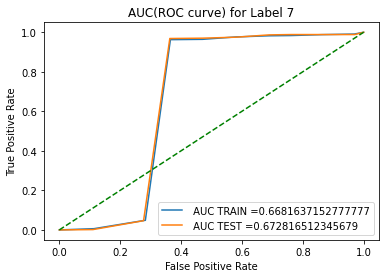

In [ ]:
train_predicted = clf.predict(X_train)
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, train_predicted, pos_label = 7)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, predicted, pos_label = 7)


plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC(ROC curve) for Label 7")
# plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

In [ ]:
output_dict = classification_report(y_test, predicted, output_dict = True)

In [ ]:
df_temp = pd.DataFrame(output_dict).transpose()

In [ ]:
df_temp.head()

,precision,recall,f1-score,support
0,0.903614,0.250000,0.391645,600.0
1,0.846957,0.811667,0.828936,600.0
2,0.780000,0.715000,0.746087,600.0
3,0.877551,0.573333,0.693548,600.0
4,0.942761,0.933333,0.938023,600.0


In [ ]:
print(df_temp.to_latex(index = True))

\begin{tabular}{lrrrr}
\toprule
{} &  precision &    recall &  f1-score &      support \\
\midrule
0            &   0.903614 &  0.250000 &  0.391645 &   600.000000 \\
1            &   0.846957 &  0.811667 &  0.828936 &   600.000000 \\
2            &   0.780000 &  0.715000 &  0.746087 &   600.000000 \\
3            &   0.877551 &  0.573333 &  0.693548 &   600.000000 \\
4            &   0.942761 &  0.933333 &  0.938023 &   600.000000 \\
5            &   0.950166 &  0.953333 &  0.951747 &   600.000000 \\
6            &   0.991364 &  0.956667 &  0.973707 &   600.000000 \\
7            &   0.542689 &  0.921667 &  0.683138 &   600.000000 \\
8            &   0.625946 &  0.965000 &  0.759344 &   600.000000 \\
9            &   0.804348 &  0.801667 &  0.803005 &   600.000000 \\
accuracy     &   0.788167 &  0.788167 &  0.788167 &     0.788167 \\
macro avg    &   0.826540 &  0.788167 &  0.776918 &  6000.000000 \\
weighted avg &   0.826540 &  0.788167 &  0.776918 &  6000.000000 \\
\bottomrule
\end{

## GridSearch

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
len(X_train)

21000

In [ ]:
param_grid = {'C': [0.1,1, 10], 'gamma': [0.01, 0.001], 'kernel': ['poly']}
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=False, cv = 2)
grid.fit(X_train,y_train)

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.01, 0.001],
                         'kernel': ['poly']},
             verbose=False)

In [ ]:
print(grid.best_estimator_)

SVC(C=0.1, gamma=0.01, kernel='poly')


In [ ]:
clf_svc = SVC()
clf_svc.fit(X_train, y_train)

predicted = clf_svc.predict(X_test)

# get the accuracy
print (accuracy_score(y_test, predicted))

0.8371666666666666


In [ ]:
grid

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.01, 0.001],
                         'kernel': ['poly']},
             verbose=False)

In [ ]:
grid.cv_results_

{'mean_fit_time': array([45.81561267, 47.65690422, 45.75759482, 48.46956682, 44.67763567,
        48.62262881]),
 'std_fit_time': array([5.8149029 , 7.69757247, 5.62120914, 8.4939611 , 6.67617774,
        6.57227576]),
 'mean_score_time': array([1.4166044 , 1.2295506 , 1.19583488, 1.20973802, 1.20978665,
        1.24512064]),
 'std_score_time': array([0.14897072, 0.00081372, 0.02158475, 0.00026941, 0.00567627,
        0.01857364]),
 'param_C': masked_array(data=[0.1, 0.1, 1, 1, 10, 10],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_gamma': masked_array(data=[0.01, 0.001, 0.01, 0.001, 0.01, 0.001],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['poly', 'poly', 'poly', 'poly', 'poly', 'poly'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'p

In [ ]:
clf_best_svc = SVC(C=1, kernel='poly')
clf_best_svc.fit(X_train, y_train)

predicted = clf_best_svc.predict(X_test)

# get the accuracy
print (accuracy_score(y_test, predicted))

0.8518333333333333


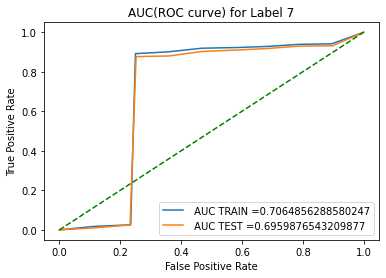

In [ ]:
train_predicted = clf_best_svc.predict(X_train)
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, train_predicted, pos_label = 7)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, predicted, pos_label = 7)


plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC(ROC curve) for Label 7")
# plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

# Preprocess the features using VGG19 on SVM

## Using LSTM for training


In [ ]:
def convert_to_spectogram(raw_data):
    '''converting to spectrogram'''
    spect = librosa.feature.melspectrogram(y=raw_data) # n_mels as output shape
    mel_spect = librosa.power_to_db(S=spect, ref=np.max)
    return mel_spect

In [ ]:
X = np.array([convert_to_spectogram(np.array(X)) for x in X])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

ParameterError: ignored

In [ ]:
X[0]

array([-6.04037598e+02,  1.03272125e+02, -4.01398577e-02,  2.44498920e+01,
        2.38429317e+01,  6.73515987e+00,  4.25964546e+00, -8.76379967e+00,
        8.71340394e-01,  8.15190136e-01, -6.89244604e+00,  6.22504316e-02,
        5.67815113e+00,  3.15446734e-01, -3.30251068e-01,  6.19617748e+00,
       -6.31265700e-01,  4.20922995e+00, -1.28142262e+01,  2.58482528e+00,
       -3.84930468e+00,  1.58123434e+00, -3.74053097e+00,  5.63744128e-01,
       -5.79679728e+00,  2.40052605e+00, -5.49514675e+00,  2.72119212e+00,
       -1.17614353e-03,  1.08636010e+00, -3.43729138e+00,  5.90452099e+00,
       -4.67537737e+00,  3.04623771e+00, -2.17289543e+00, -5.86101413e-01,
       -5.63947392e+00,  3.79031467e+00, -1.13673234e+00,  1.56207228e+00])

In [ ]:
input_layer=Input(shape=(64,40), dtype=np.float32,name='input_layer')
lstm=LSTM(500,name='lstm_layer',return_sequences=True)(input_layer)
d1=Dense(120,activation='relu',name='dense1')(tf.math.reduce_mean(lstm, 2))
d2=Dense(60,activation='relu',name='dense2')(d1)
d3=Dense(10,activation='softmax',name='dense3')(d2)